In [1]:
station_name = "Marshall"
iterations = 300000
mask_years = [2021]
measurements_folder = f"./measurements/{station_name.capitalize()}"
if len(mask_years) > 0:
    station_name = station_name + "_mask-" + "-".join([str(year) for year in mask_years])


In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import tempfile
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from utils.utils import pretty_lat, pretty_lon, ProgressStatus, plot_n_steps_of_area_from_nc_file

In [3]:
from station.data_submission import DataSubmission


from train_station_twin.training_executer import TrainingExecuter
%matplotlib inline
from utils.utils import plot_measurements_df


Extracting Marshall_mask-2021...


  0%|          | 0/2465 [00:00<?, ?it/s]

100%|██████████| 2465/2465 [03:26<00:00, 11.96it/s]


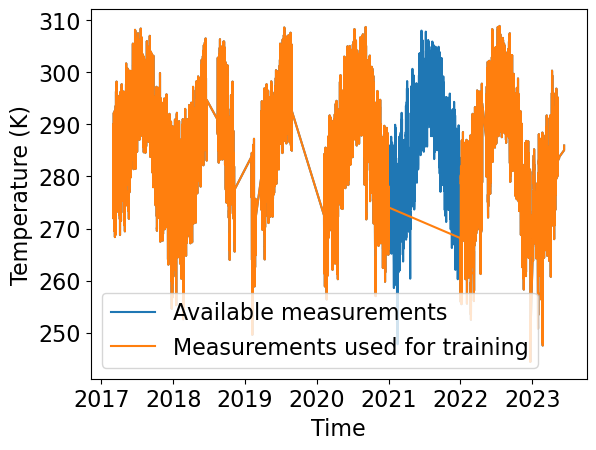

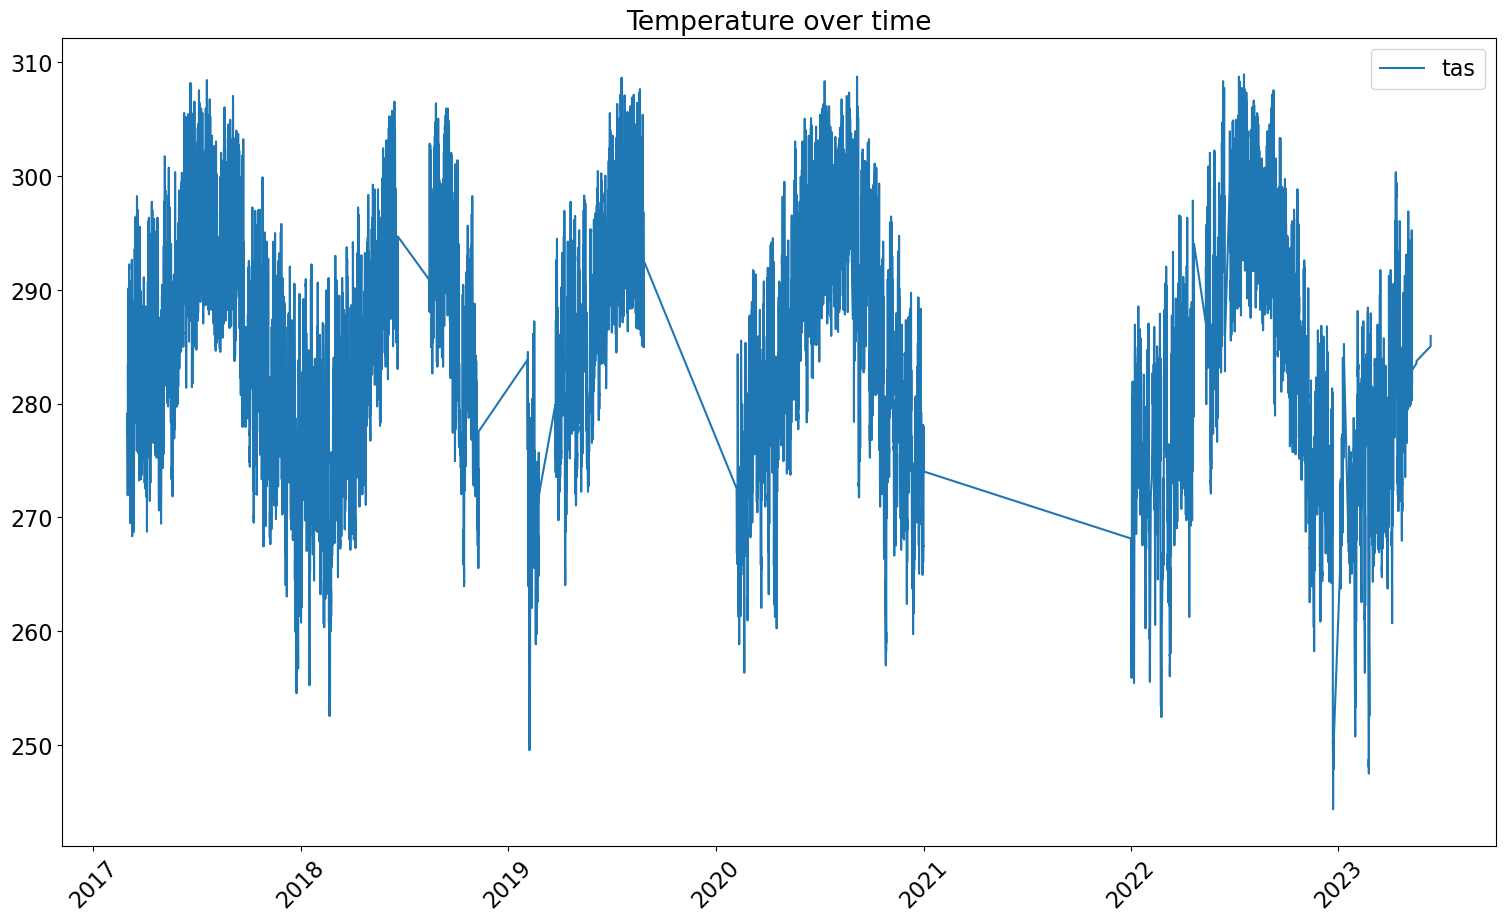

In [4]:
station_submission = DataSubmission(name=station_name, mask_years=mask_years)
station_submission.measurement_dir_path = measurements_folder

station_submission.initialize_station()
plot_measurements_df(station_submission.station.df)

In [5]:
training = TrainingExecuter(
    station = station_submission.station,
    progress = station_submission.progress,
    iterations = iterations,
    local = True,
)
job_id = training.execute_with_sbatch()

(41883,)
Saving to ./executed_trainings/Marshall_mask-2021_20240520-2210/target__0t53j2v/train/marshall_mask-2021.nc


Downloading... 2017


2024-05-20 22:10:02,456 INFO Welcome to the CDS
2024-05-20 22:10:02,457 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-20 22:10:02,585 INFO Request is queued


In [ ]:
print(f"Job ID: {job_id}")
print(f"tail -f {training.temp_dir.name}/slurm_logs/crai_crai-train_{job_id}.log")

Job ID: 10187821
tail -f ./executed_trainings/Vienna_mask-2019_20240506-1606/temp_o61pgw_u/slurm_logs/crai_crai-train_10187821.log


In [ ]:
from station.data_submission import DataSubmission
test_sub = DataSubmission(name="test", mask_years=[])
test_sub.measurement_dir_path = "/Users/timo.wacke/Downloads/test"
test_sub.initialize_station()
df = test_sub.station.converter.original_df
print(df.columns)
# print mcp8908 data
print(df["mcp9808"])
df = test_sub.station.converter.transform_df_to_tas(df)
test_sub.station.converter.export_a_df_to_tas(df, "test.tas")

Extracting test...


100%|██████████| 10/10 [00:00<00:00, 15.77it/s]

Index(['bmp180_temp', 'bmp180_pres', 'bmp180_slp', 'bmp180_alt', 'bmp280_temp',
       'bmp280_pres', 'bmp280_slp', 'bmp280_alt', 'bme_temp', 'bme_pres',
       'bme_slp', 'bme_alt', 'bme_hum', 'htu_temp', 'htu_hum', 'mcp9808',
       'tipping', 'vis_light', 'ir_light', 'uv_light', 'wind_dir',
       'wind_speed'],
      dtype='object')
datetime
2017-04-24 07:00:00      NaN
2017-04-24 08:00:00      NaN
2017-04-24 09:00:00      NaN
2017-04-24 10:00:00      NaN
2017-04-24 11:00:00      NaN
                       ...  
2017-05-04 19:00:00    11.10
2017-05-04 20:00:00    10.45
2017-05-04 21:00:00    10.00
2017-05-04 22:00:00     9.90
2017-05-04 23:00:00    10.80
Name: mcp9808, Length: 233, dtype: float64
